In [1]:
!pip install -U mxnet-cu101==1.7.0
!pip install d2l==0.17.2

     |███████████████████████████████▌| 834.1 MB 1.3 MB/s eta 0:00:10tcmalloc: large alloc 1147494400 bytes == 0x55bb3dc08000 @  0x7f00ef111615 0x55bb042e34cc 0x55bb043c347a 0x55bb042e62ed 0x55bb043d7e1d 0x55bb04359e99 0x55bb043549ee 0x55bb042e7bda 0x55bb04359d00 0x55bb043549ee 0x55bb042e7bda 0x55bb04356737 0x55bb043d8c66 0x55bb04355daf 0x55bb043d8c66 0x55bb04355daf 0x55bb043d8c66 0x55bb04355daf 0x55bb042e8039 0x55bb0432b409 0x55bb042e6c52 0x55bb04359c25 0x55bb043549ee 0x55bb042e7bda 0x55bb04356737 0x55bb043549ee 0x55bb042e7bda 0x55bb04355915 0x55bb042e7afa 0x55bb04355c0d 0x55bb043549ee
     |████████████████████████████████| 846.0 MB 21 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 82 kB 532 kB/s 
     |████████████████████████████████| 20.1 MB 33.4 MB/s 
     |████████████████████████████████| 61 kB 6.4 MB/s 
     |████████

# Deep Convolutional Neural Networks (AlexNet)
# Capacity Control and Preprocessing

In [1]:
from mxnet import np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()

net = nn.Sequential()
# Here, we use a larger 11 x 11 window to capture objects. At the same time,
# we use a stride of 4 to greatly reduce the height and width of the output.
# Here, the number of output channels is much larger than that in LeNet
net.add(nn.Conv2D(96, kernel_size=11, strides=4, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        # Make the convolution window smaller, set padding to 2 for consistent
        # height and width across the input and output, and increase the
        # number of output channels
        nn.Conv2D(256, kernel_size=5, padding=2, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        # Use three successive convolutional layers and a smaller convolution
        # window. Except for the final convolutional layer, the number of
        # output channels is further increased. Pooling layers are not used to
        # reduce the height and width of input after the first two
        # convolutional layers
        nn.Conv2D(384, kernel_size=3, padding=1, activation='relu'),
        nn.Conv2D(384, kernel_size=3, padding=1, activation='relu'),
        nn.Conv2D(256, kernel_size=3, padding=1, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        # Here, the number of outputs of the fully-connected layer is several
        # times larger than that in LeNet. Use the dropout layer to mitigate
        # overfitting
        nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
        nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
        # Output layer. Since we are using Fashion-MNIST, the number of
        # classes is 10, instead of 1000 as in the paper
        nn.Dense(10))

In [2]:
X = np.random.uniform(size=(1, 1, 224, 224))
net.initialize()
for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

conv0 output shape:	 (1, 96, 54, 54)
pool0 output shape:	 (1, 96, 26, 26)
conv1 output shape:	 (1, 256, 26, 26)
pool1 output shape:	 (1, 256, 12, 12)
conv2 output shape:	 (1, 384, 12, 12)
conv3 output shape:	 (1, 384, 12, 12)
conv4 output shape:	 (1, 256, 12, 12)
pool2 output shape:	 (1, 256, 5, 5)
dense0 output shape:	 (1, 4096)
dropout0 output shape:	 (1, 4096)
dense1 output shape:	 (1, 4096)
dropout1 output shape:	 (1, 4096)
dense2 output shape:	 (1, 10)


# Reading the Dataset

In [3]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

# Training

loss 0.332, train acc 0.879, test acc 0.889
742.6 examples/sec on gpu(0)


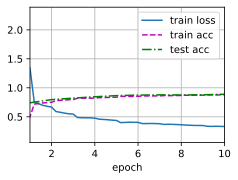

In [4]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())